In [1]:
import numpy as np
import matplotlib.pyplot as plt

import matplotlib.style
import matplotlib as mpl
mpl.style.use('classic')

import baraffe_tables
from baraffe_tables.table_search import baraffe_table_search

from astropy.table import Table
from astropy import units as u
from astropy.constants import G

%matplotlib inline

In [2]:
def dynamical_time(r, m):
    volume = (4/3.)*np.pi*r**3
    rho = m/volume
    return np.sqrt(1/(G*rho))


In [3]:
tJ = dynamical_time(u.jupiterRad,u.jupiterMass)
print(tJ.to(u.min))

tSun = dynamical_time(u.solRad,u.solMass)
print(tSun.to(u.min))



57.93139731912483 min
54.333820328822455 min


In [8]:
nuMaxSun = (3000*1.e-6)*u.Hz
print(nuMaxSun)
pSun = 1/nuMaxSun
print(pSun.to(u.min))

nuMaxJ = (1000*1.e-6)*u.Hz
print(nuMaxJ)
pJ = 1/nuMaxJ
print(pJ.to(u.min))

0.003 Hz
5.555555555555555 min
0.001 Hz
16.666666666666668 min


In [2]:
ls

MESAtests/                          directlyImagedPlanets.txt
baraffe+2003_fig1.pdf               plot_directly_imaged_planets.ipynb
baraffe+2003_fig1_orig.png          to_read/
baraffe_tables_test.ipynb


In [30]:
planets = Table.read("directlyImagedPlanets.txt",format="ascii")
print(planets.colnames)

for col in planets.colnames:
    try:
        planets[col].fill_value = np.nan
    except TypeError:
        planets[col] = planets[col].astype(float)
        planets[col].fill_value = np.nan

#restrict for now to planet-mass objects
planets = planets[planets['pl_massj'] <= 13.6]

['pl_name', 'hostname', 'pl_letter', 'hd_name', 'hip_name', 'tic_id', 'gaia_id', 'default_flag', 'sy_snum', 'sy_pnum', 'sy_mnum', 'cb_flag', 'discoverymethod', 'disc_year', 'disc_refname', 'disc_pubdate', 'disc_locale', 'disc_facility', 'disc_telescope', 'disc_instrument', 'rv_flag', 'pul_flag', 'ptv_flag', 'tran_flag', 'ast_flag', 'obm_flag', 'micro_flag', 'etv_flag', 'ima_flag', 'dkin_flag', 'soltype', 'pl_controv_flag', 'pl_refname', 'pl_orbper', 'pl_orbpererr1', 'pl_orbpererr2', 'pl_orbperlim', 'pl_orbsmax', 'pl_orbsmaxerr1', 'pl_orbsmaxerr2', 'pl_orbsmaxlim', 'pl_rade', 'pl_radeerr1', 'pl_radeerr2', 'pl_radelim', 'pl_radj', 'pl_radjerr1', 'pl_radjerr2', 'pl_radjlim', 'pl_masse', 'pl_masseerr1', 'pl_masseerr2', 'pl_masselim', 'pl_massj', 'pl_massjerr1', 'pl_massjerr2', 'pl_massjlim', 'pl_msinie', 'pl_msinieerr1', 'pl_msinieerr2', 'pl_msinielim', 'pl_msinij', 'pl_msinijerr1', 'pl_msinijerr2', 'pl_msinijlim', 'pl_cmasse', 'pl_cmasseerr1', 'pl_cmasseerr2', 'pl_cmasselim', 'pl_cmassj',

In [31]:
def errorbarFormat(planetTable, colname):
    lower_unc_colname = '{0}err2'.format(colname)
    upper_unc_colname = '{0}err1'.format(colname)

    return np.vstack((np.abs(np.array(planetTable[lower_unc_colname])),np.array(planetTable[upper_unc_colname])))
    

LkCa 15 b, orbsmax=14.7 AU, mass=nan M_J
LkCa 15 c, orbsmax=18.6 AU, mass=nan M_J
MWC 758 c, orbsmax=100.0 AU, mass=nan M_J
SR 12 AB c, orbsmax=nan AU, mass=13.0 M_J
TYC 8998-760-1 c, orbsmax=nan AU, mass=7.2 M_J
5/45 planets not plotted because semi-major axis or mass are nan


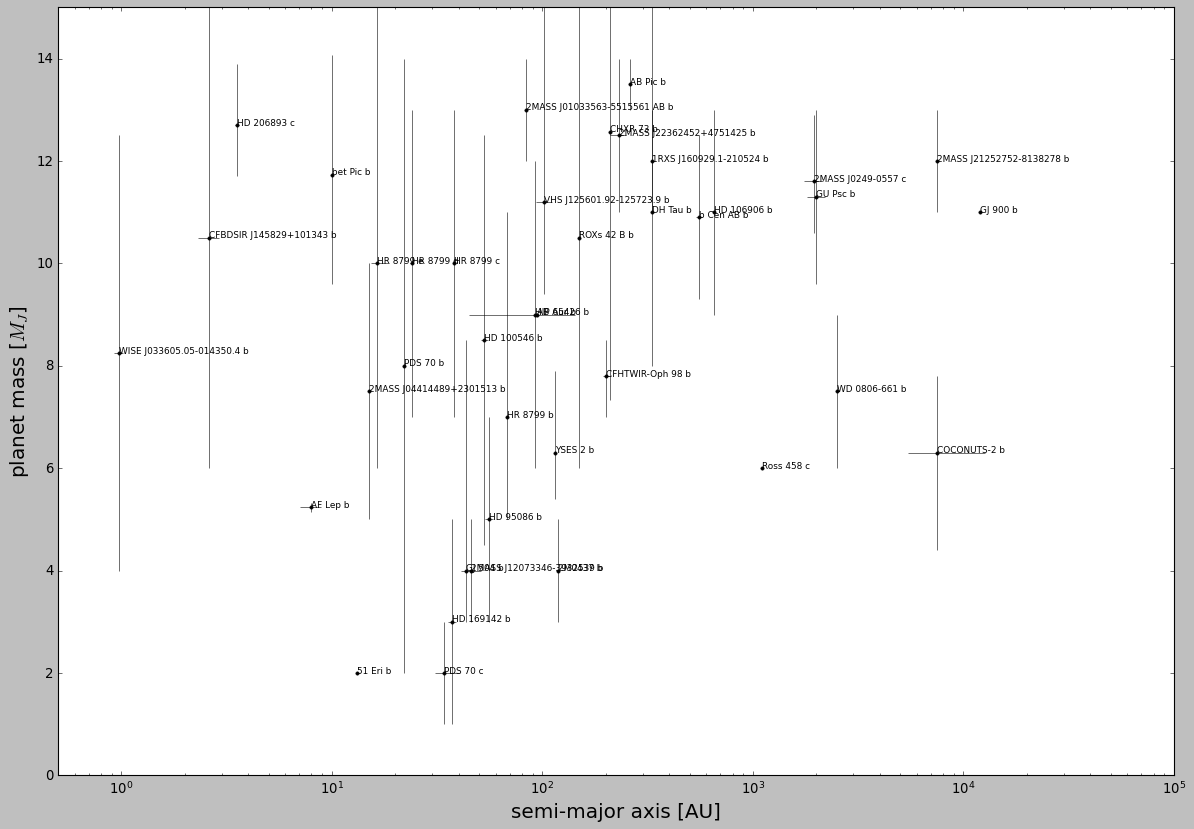

In [36]:
fig, ax = plt.subplots(1,1,figsize=(18,12))

ax.errorbar(planets['pl_orbsmax'],planets['pl_massj'], xerr=errorbarFormat(planets,'pl_orbsmax'),yerr=errorbarFormat(planets,'pl_massj'),elinewidth=0.5,capsize=0,color='k',marker='.',linestyle='None')

numNans = 0
for i in range(len(planets)):

    orbsmax = planets['pl_orbsmax'].filled()[i]
    massj = planets['pl_massj'].filled()[i]

    if np.isnan(massj) or np.isnan(orbsmax):
        print("{0}, orbsmax={1} AU, mass={2} M_J".format(planets['pl_name'][i], orbsmax, massj))
        numNans+=1
    else:
        ax.text(planets['pl_orbsmax'][i],planets['pl_massj'][i], s="{0}".format(planets['pl_name'][i]), fontsize=8)

ax.set_xlabel("semi-major axis [AU]",fontsize=18)
ax.set_xlim(0.5,1.e5)
ax.set_xscale("log")
ax.set_ylabel(r"planet mass [$M_J$]",fontsize=18)
ax.set_ylim(0.,15)
#ax.set_yscale("log")
print("{0}/{1} planets not plotted because semi-major axis or mass are nan".format(numNans, len(planets)))
plt.show()

2MASS J01033563-5515561 AB b, age=30.0 Myr, eqm temp=nan K
2MASS J0249-0557 c, age=22.0 Myr, eqm temp=nan K
2MASS J04414489+2301513 b, age=1.0 Myr, eqm temp=nan K
2MASS J12073346-3932539 b, age=nan Myr, eqm temp=1150.0 K
2MASS J21252752-8138278 b, age=nan Myr, eqm temp=1616.0 K
2MASS J22362452+4751425 b, age=120.0 Myr, eqm temp=nan K
AB Aur b, age=3.0 Myr, eqm temp=nan K
AB Pic b, age=30.0 Myr, eqm temp=nan K
CFBDSIR J145829+101343 b, age=nan Myr, eqm temp=370.0 K
CHXR 73 b, age=2.0 Myr, eqm temp=nan K
DH Tau b, age=1.0 Myr, eqm temp=nan K
GJ 900 b, age=200.0 Myr, eqm temp=nan K
HD 100546 b, age=5.0 Myr, eqm temp=nan K
HD 169142 b, age=6.0 Myr, eqm temp=nan K
HR 8799 b, age=60.0 Myr, eqm temp=nan K
HR 8799 c, age=60.0 Myr, eqm temp=nan K
HR 8799 d, age=60.0 Myr, eqm temp=nan K
LkCa 15 b, age=nan Myr, eqm temp=nan K
LkCa 15 c, age=nan Myr, eqm temp=nan K
Ross 458 c, age=500.0 Myr, eqm temp=nan K
SR 12 AB c, age=2.0 Myr, eqm temp=nan K
TYC 8998-760-1 c, age=27.0 Myr, eqm temp=nan K
VHS J

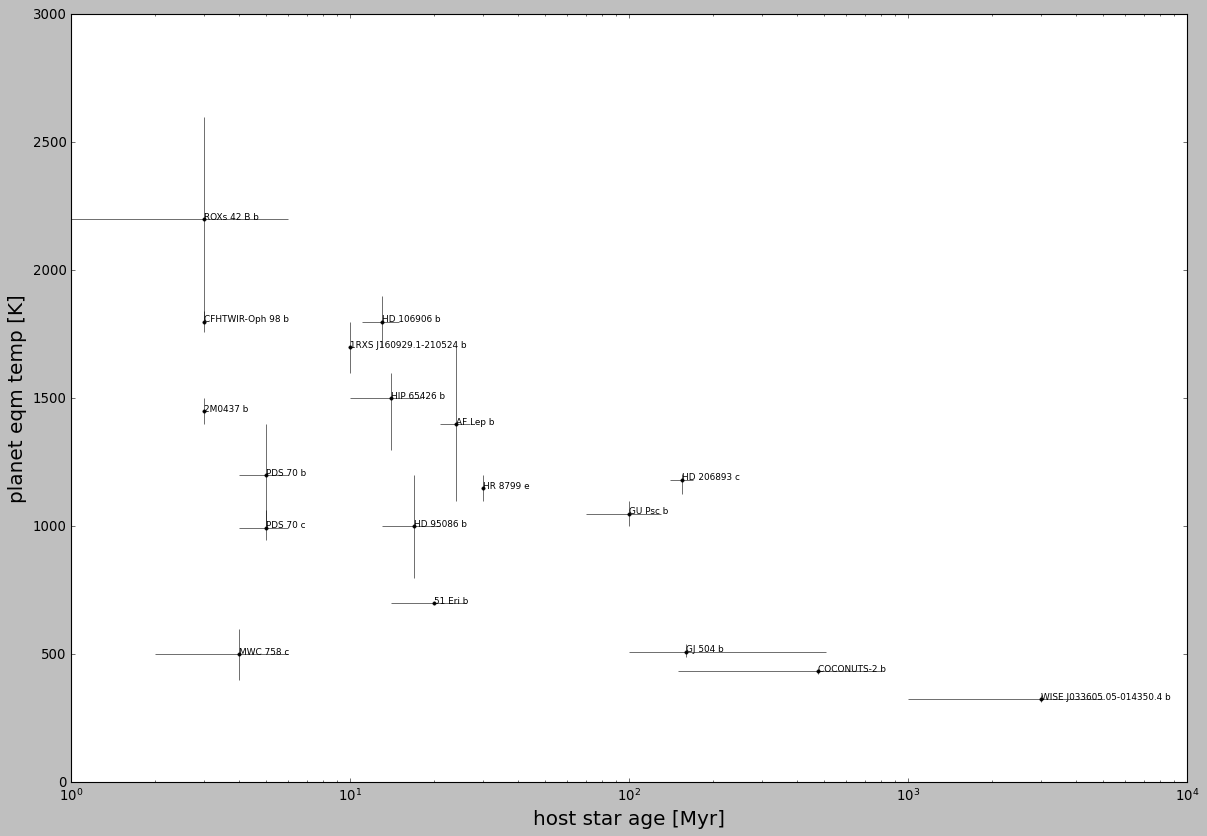

In [33]:
fig, ax = plt.subplots(1,1,figsize=(18,12))

ax.errorbar(planets['st_age']*1000,planets['pl_eqt'], xerr=errorbarFormat(planets,'st_age')*1000,yerr=errorbarFormat(planets,'pl_eqt'),elinewidth=0.5,capsize=0,color='k',marker='.',linestyle='None')

numNans = 0
for i in range(len(planets)):

    age = planets['st_age'].filled()[i]*1000
    eqt = planets['pl_eqt'].filled()[i]

    if np.isnan(age) or np.isnan(eqt):
        print("{0}, age={1} Myr, eqm temp={2} K".format(planets['pl_name'][i], age, eqt))
        numNans+=1
    else:
        ax.text(planets['st_age'][i]*1000,planets['pl_eqt'][i], s="{0}".format(planets['pl_name'][i]), fontsize=8)

ax.set_xlabel("host star age [Myr]",fontsize=18)
#ax.set_xlim(0.5,1.e5)
ax.set_xscale("log")
ax.set_ylabel("planet eqm temp [K]",fontsize=18)
#ax.set_ylim(0.,31)
#ax.set_yscale("log")
print("{0}/{1} planets not plotted because stellar age or insolation are nan".format(numNans, len(planets)))
plt.show()

2MASS J01033563-5515561 AB b, age=30.0 Myr, Teff=nan K
2MASS J0249-0557 c, age=22.0 Myr, Teff=nan K
2MASS J04414489+2301513 b, age=1.0 Myr, Teff=nan K
2MASS J12073346-3932539 b, age=nan Myr, Teff=2825.0 K
2MASS J21252752-8138278 b, age=nan Myr, Teff=nan K
51 Eri b, age=20.0 Myr, Teff=nan K
AB Pic b, age=30.0 Myr, Teff=nan K
CFBDSIR J145829+101343 b, age=nan Myr, Teff=580.5 K
CHXR 73 b, age=2.0 Myr, Teff=nan K
DH Tau b, age=1.0 Myr, Teff=nan K
GJ 900 b, age=200.0 Myr, Teff=nan K
GU Psc b, age=100.0 Myr, Teff=nan K
HD 169142 b, age=6.0 Myr, Teff=nan K
HD 206893 c, age=155.0 Myr, Teff=nan K
HD 95086 b, age=17.0 Myr, Teff=nan K
HR 8799 b, age=60.0 Myr, Teff=nan K
HR 8799 c, age=60.0 Myr, Teff=nan K
HR 8799 d, age=60.0 Myr, Teff=nan K
LkCa 15 b, age=nan Myr, Teff=4194.0 K
LkCa 15 c, age=nan Myr, Teff=4194.0 K
MWC 758 c, age=4.0 Myr, Teff=nan K
ROXs 42 B b, age=3.0 Myr, Teff=nan K
Ross 458 c, age=500.0 Myr, Teff=nan K
SR 12 AB c, age=2.0 Myr, Teff=nan K
TYC 8998-760-1 c, age=27.0 Myr, Teff=n

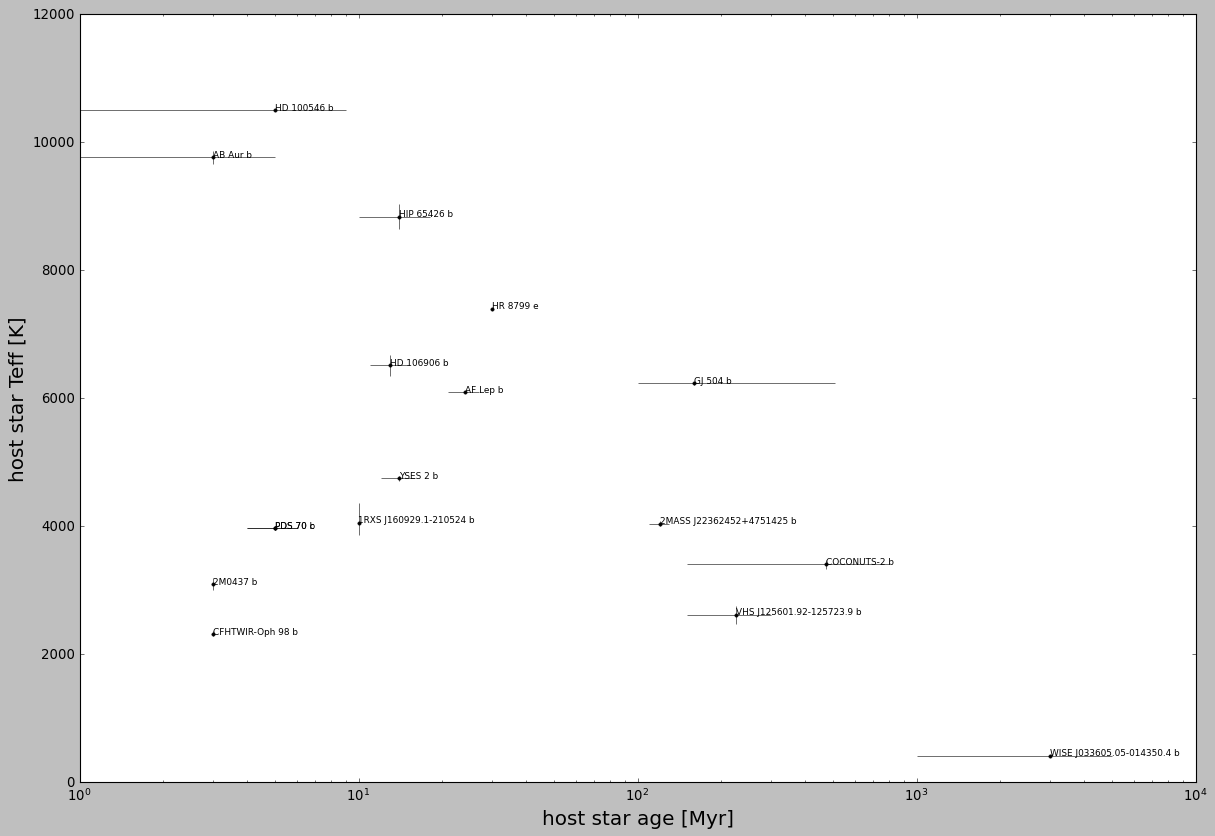

In [34]:
fig, ax = plt.subplots(1,1,figsize=(18,12))

ax.errorbar(planets['st_age']*1000,planets['st_teff'], xerr=errorbarFormat(planets,'st_age')*1000,yerr=errorbarFormat(planets,'st_teff'),elinewidth=0.5,capsize=0,color='k',marker='.',linestyle='None')

numNans = 0
for i in range(len(planets)):

    age = planets['st_age'].filled()[i]*1000
    teff = planets['st_teff'].filled()[i]

    if np.isnan(age) or np.isnan(teff):
        print("{0}, age={1} Myr, Teff={2} K".format(planets['pl_name'][i], age, teff))
        numNans+=1
    else:
        ax.text(planets['st_age'][i]*1000,planets['st_teff'][i], s="{0}".format(planets['pl_name'][i]), fontsize=8)

ax.set_xlabel("host star age [Myr]",fontsize=18)
#ax.set_xlim(0.5,1.e5)
ax.set_xscale("log")
ax.set_ylabel("host star Teff [K]",fontsize=18)
#ax.set_ylim(0.,31)
#ax.set_yscale("log")
print("{0}/{1} planets not plotted because stellar age or Teff are nan".format(numNans, len(planets)))
plt.show()

2MASS J01033563-5515561 AB b, teff=nan K, loglum=nan
2MASS J0249-0557 c, teff=nan K, loglum=-2.59
2MASS J04414489+2301513 b, teff=nan K, loglum=nan
2MASS J21252752-8138278 b, teff=nan K, loglum=nan
2MASS J22362452+4751425 b, teff=4045.0 K, loglum=nan
51 Eri b, teff=nan K, loglum=0.85
AB Pic b, teff=nan K, loglum=nan
AF Lep b, teff=6100.0 K, loglum=nan
CFBDSIR J145829+101343 b, teff=580.5 K, loglum=nan
CHXR 73 b, teff=nan K, loglum=nan
DH Tau b, teff=nan K, loglum=nan
GJ 900 b, teff=nan K, loglum=nan
GU Psc b, teff=nan K, loglum=nan
HD 169142 b, teff=nan K, loglum=nan
HD 206893 c, teff=nan K, loglum=nan
HD 95086 b, teff=nan K, loglum=nan
HIP 65426 b, teff=8840.0 K, loglum=nan
HR 8799 b, teff=nan K, loglum=0.692
HR 8799 c, teff=nan K, loglum=0.692
HR 8799 d, teff=nan K, loglum=0.692
HR 8799 e, teff=7400.0 K, loglum=nan
LkCa 15 b, teff=4194.0 K, loglum=nan
LkCa 15 c, teff=4194.0 K, loglum=nan
MWC 758 c, teff=nan K, loglum=nan
PDS 70 c, teff=3972.0 K, loglum=nan
ROXs 42 B b, teff=nan K, lo

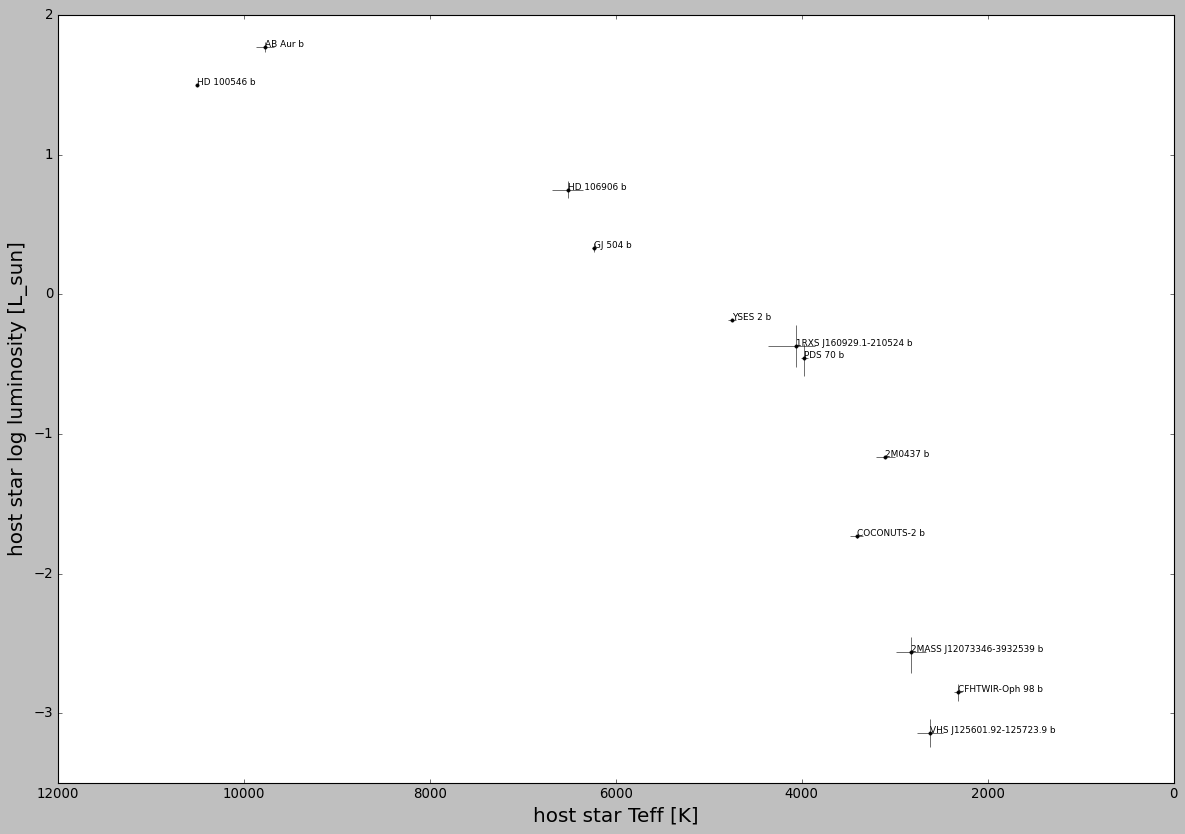

In [35]:
fig, ax = plt.subplots(1,1,figsize=(18,12))

ax.errorbar(planets['st_teff'],planets['st_lum'], xerr=errorbarFormat(planets,'st_teff'),yerr=errorbarFormat(planets,'st_lum'),elinewidth=0.5,capsize=0,color='k',marker='.',linestyle='None')

numNans = 0
for i in range(len(planets)):

    teff = planets['st_teff'].filled()[i]
    loglum = planets['st_lum'].filled()[i]

    if np.isnan(teff) or np.isnan(loglum):
        print("{0}, teff={1} K, loglum={2}".format(planets['pl_name'][i], teff, loglum))
        numNans+=1
    else:
        ax.text(planets['st_teff'][i],planets['st_lum'][i], s="{0}".format(planets['pl_name'][i]), fontsize=8)

ax.set_xlabel("host star Teff [K]",fontsize=18)
#ax.set_xlim(0.5,1.e5)
ax.set_xlim(12000,0)
ax.set_ylabel("host star log luminosity [L_sun]",fontsize=18)
ax.set_ylim(-3.5,2)
#ax.set_yscale("log")
print("{0}/{1} planets not plotted because stellar Teff or log luminosity are nan".format(numNans, len(planets)))
plt.show()